# Лекция-консультация: разбор итогового проекта

**Цель проекта**

Разработать гибридную систему рекомендаций книг, объединяющую несколько алгоритмов.

## **Этап 1. Подготовка данных**

### **Задача 1.1. Создание расширенных признаков**

**Теоретический материал**
```
Feature Engineering в рекомендательных системах.

Типы признаков:
• User Features: активность, демография, поведение
• Item Features: популярность, контент, метаданные  
• Context Features: время, устройство, сессия

Методы:
• Aggregation: count, mean, std, unique
• Temporal: recency, frequency, seasonality
• Text: TF-IDF, embeddings, topic modeling
```

**Практические примеры**
```python
# Признаки пользователей
user_activity = count(interactions)
rating_consistency = std(ratings)
genre_diversity = count(unique_genres)

# Признаки книг  
book_popularity = count(ratings)
quality_consistency = mean(rating_std)
author_authority = mean(author_books_ratings)
```

---

## **Этап 2. Гибридная система**

### **Задача 2.1. Стратегия объединения моделей**

**Теоретический материал**
```
Гибридные подходы:

1. Weighted: средневзвешенное объединение
   score = w1*model1 + w2*model2 + ...

2. Switching: разные модели для разных сценариев
   IF new_user THEN popularity ELSE collaborative

3. Cascade: последовательное применение
   candidates = model1 → rerank = model2

4. Feature Combination: объединение признаков
   features = [user_emb, item_emb, context]
```

**Формула взвешенного объединения**
```
final_score = α × popularity_score + β × content_score + γ × cf_score
где α + β + γ = 1
```

### **Задача 2.2. Балансировка рекомендаций**

**Теоретический материал**
```
Компромисс в рекомендациях:

• Exploration vs Exploitation
  — Exploitation: персонализация (точность)
  — Exploration: разнообразие (новизна)

• Методы балансировки:
  — ε-greedy: с вероятностью ε выбираем случайное
  — UCB (Upper Confidence Bound): учёт uncertainty
  — Thompson Sampling: байесовский подход

• Long-tail-проблема:
  — 20% популярного контента → 80% взаимодействий
  — Необходимо рекомендовать нишевый контент
```

**Практическая формула**
```
final_recs = 0.7 × personalized + 0.3 × diverse
```

---

## **Этап 3. Оценка качества**

### **Задача 3.1. Метрики качества**

**Теоретический материал**
```
Офлайн-метрики:

1. Precision@K = (#релевантных в топ-K) / K
   Измеряет точность рекомендаций

2. Recall@K = (#релевантных в топ-K) / (#всех релевантных)  
   Измеряет полноту покрытия

3. nDCG@K = DCG / IDCG
   Учитывает порядок релевантных items
   DCG = Σ(rel_i / log₂(i+1))

4. Coverage = (#уникальных рекомендованных) / (#всего items)
   Измеряет разнообразие рекомендаций

5. Novelty = -Σ(p(i) × log p(i))
   Измеряет новизну рекомендаций
```

---

## **Продвинутая часть**

### **Задача 4.1. Нейросетевые архитектуры**

**Теоретический материал**
```
Wide & Deep Learning:

• Wide Component: меморизация (memorization)
  - Линейная модель с cross-product-преобразованиями
  - Запоминает частые co-occurrence-паттерны
  - Формула: y_wide = wᵀ[x, φ(x)]

• Deep Component: генерализация (generalization)
  - Feed-forward-нейросеть с эмбеддингами
  - Обобщает на unseen feature combinations
  - Формула: a⁽ˡ⁺¹⁾ = f(W⁽ˡ⁾a⁽ˡ⁾ + b⁽ˡ⁾)

• Объединение: P(Y=1|x) = σ(y_wide + y_deep + b)
```

**Архитектура**
```
Input: [user_features, item_features, interaction_features]
       ↓
Wide: Linear(user_id × item_id, ...)
       ↓  
Deep: Embedding → Dense(128) → Dense(64) → Dense(1)
       ↓
Output: σ(wide_output + deep_output)
```

---

### **Задача 4.2. Модель Two-Tower**

**Теоретический материал**
```
Two-Tower Architecture:

• User Tower: эмбеддинг пользователя
  Input: [user_features, user_history]
  Output: user_embedding ∈ Rᵈ

• Item Tower: эмбеддинг айтема  
  Input: [item_features, item_content]
  Output: item_embedding ∈ Rᵈ

• Similarity: score = user_embedding ᵀ item_embedding

Преимущества:
• Эффективный inference (precomputed item embeddings)
• Масштабируемость на большие каталоги
• Хорошо работает для candidate generation
```

**Обучение**
```
Loss = -log(σ(uᵢᵀvⱼ)) - Σ log(σ(-uᵢᵀvₖ))  # negative sampling
где vⱼ — позитивный пример, vₖ — негативные примеры
```


---

## **Интеграция нейросетевой модели**

### **Задача 4.2. Встраивание в существующую систему**

**Теоретический материал**
```
Стратегии интеграции нейросетевых моделей:

1. Дополнение кандидатов:
   Нейросеть → генерация кандидатов → объединение с классическими моделями → ранжирование

2. Улучшение ранжирования:
   Классические модели → кандидаты → нейросеть → финальное ранжирование

3. Взвешенное объединение:
   final_score = α × neural_score + β × classic_score + γ × content_score

Ключевые принципы:
• Постепенное внедрение (canary deployment)
• A/B-тестирование эффективности
• Совместимость форматов данных
• Единый интерфейс предсказаний
```

**Практическая реализация**
```python
class EnhancedHybridRecommender:
    def __init__(self):
        self.models = {
            'neural': NeuralModel(),
            'collaborative': CollaborativeModel(),
            'content': ContentModel(),
            'popularity': PopularityModel()
        }
        
        self.weights = {
            'new_user': {'neural': 0.2, 'content': 0.4, 'popularity': 0.4},
            'active_user': {'neural': 0.5, 'collaborative': 0.3, 'content': 0.2},
            'power_user': {'neural': 0.6, 'collaborative': 0.4}
        }
    
    def get_recommendations(self, user):
        user_type = self.determine_user_type(user)
        weights = self.weights[user_type]
        
        all_candidates = {}
        for model_name, model in self.models.items():
            if model_name in weights:
                recommendations = model.recommend(user)
                weight = weights[model_name]
                for i, book in enumerate(recommendations):
                    score = weight * (1.0 / (i + 1))  # position discount
                    all_candidates[book] = all_candidates.get(book, 0) + score
        
        return sorted(all_candidates.items(), key=lambda x: x[1], reverse=True)[:10]
```

**Гипотетическое сравнение эффективности**
```
Метрика           | Без нейросети | С нейросетью | Улучшение
------------------|---------------|--------------|----------
Precision@10      | 0.028         | 0.035        | +25%
Recall@10         | 0.085         | 0.102        | +20%
nDCG@10           | 0.065         | 0.078        | +20%
Coverage          | 4.5%          | 6.8%         | +51%
```

---

### **Задача 4.3. Сквозной пайплайн**

**Теоретический материал**
```
Проектирование полного процесса обработки:

1. Загрузка и проверка данных:
   – Проверка целостности данных
   – Контроль соответствия структуры
   – Обнаружение пропущенных значений

2. Создание и преобразование признаков:
   – Предварительная обработка данных
   – Формирование характеристик объектов
   – Хранилище признаков

3. Обучение моделей:
   – Настройка параметров алгоритмов
   – Подбор оптимальных параметров
   – Проверка качества моделей

4. Формирование рекомендаций:
   – Генерация персональных предложений
   – Режимы реального времени и пакетной обработки
   – Обслуживание моделей

5. Контроль и оценка качества:
   – Сравнительное тестирование подходов
   – Измерение показателей эффективности
   – Обнаружение изменений в данных
```

---

## **Практические рекомендации**


**Стратегия разработки**
```
1. Начните с простого: реализуйте базовые модели
2. Постепенное улучшение: добавляйте сложность поэтапно  
3. Проверка каждого шага: оценивайте каждое изменение
4. Документирование решений: фиксируйте выбор архитектуры
```

**Технические советы**
```python
# 1. Модульная архитектура
class BaseRecommender:
    def train(self, data): ...
    def recommend(self, user_id, k=10): ...

# 2. Конфигурируемые параметры  
config = {
    'hybrid_weights': {'popularity': 0.3, 'content': 0.4, 'cf': 0.3},
    'diversity_ratio': 0.2,
    'neural_embedding_dim': 64
}

# 3. Воспроизводимость
set_random_seed(42)
save_model_artifacts()
document_feature_engineering()
```

---

## **Чек-лист выполнения**

### **Базовая часть (обязательно):**
- [ ] Реализованы четыре базовые модели
- [ ] Созданы расширенные признаки пользователей и книг
- [ ] Реализована гибридная стратегия объединения
- [ ] Рассчитаны Precision@K, Recall@K, nDCG@K
- [ ] Проведён сравнительный анализ
- [ ] Сформулированы выводы

### **Продвинутая часть (дополнительно):**
- [ ] Реализована нейросетевая архитектура
- [ ] Интегрирована в гибридную систему
- [ ] Создан сквозной пайплайн
- [ ] Оценено улучшение качества

**Критерии успеха:** улучшение метрик на 30–50% по сравнению с лучшей отдельной моделью.



In [11]:
!gdown https://drive.google.com/uc?id=14rJfENi_TsJPLG-yhamJsAy1dJV4HMsb
!gdown https://drive.google.com/uc?id=1rKl_ps5pF5ZlTSdLp7qXO6PB5bV-vM8r
!gdown https://drive.google.com/uc?id=1krjM7StXXbnUjgBEumuYoZfuev8zP-zz

Downloading...
From: https://drive.google.com/uc?id=14rJfENi_TsJPLG-yhamJsAy1dJV4HMsb
To: /content/interactions_processed.csv
100% 52.4M/52.4M [00:00<00:00, 136MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rKl_ps5pF5ZlTSdLp7qXO6PB5bV-vM8r
To: /content/users_processed.csv
100% 31.9M/31.9M [00:00<00:00, 173MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1krjM7StXXbnUjgBEumuYoZfuev8zP-zz
To: /content/items_processed.csv
100% 32.1M/32.1M [00:00<00:00, 174MB/s] 


In [12]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from collections import Counter
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [21]:
interactions = pd.read_csv('interactions_processed.csv')
users = pd.read_csv('users_processed.csv')
items = pd.read_csv('items_processed.csv')

print(f"Количество просмотров/оценок: {len(interactions):,}")
print(f"Количество уникальных пользователей: {interactions['user_id'].nunique():,}")
print(f"Количество уникальных фильмов: {interactions['item_id'].nunique():,}")

total_possible_interactions = interactions['user_id'].nunique() * interactions['item_id'].nunique()
actual_interactions = len(interactions)
sparsity = (1 - actual_interactions / total_possible_interactions) * 100

print(f"\nАнализ разреженности:")
print(f"Теоретически возможных взаимодействий: {total_possible_interactions:,}")
print(f"Фактических взаимодействий: {actual_interactions:,}")
print(f"Разреженность матрицы: {sparsity:.4f}%")
print(f"Каждый пользователь видел в среднем {actual_interactions/interactions['user_id'].nunique():.1f} из {interactions['item_id'].nunique():,} фильмов")

user_activity = interactions.groupby('user_id').size()
print(f"\n Анализ активности пользователей:")
print(f"Среднее количество просмотров на пользователя: {user_activity.mean():.2f}")
print(f"Медианное количество просмотров: {user_activity.median():.2f}")
print(f"Самый активный пользователь: {user_activity.max()} просмотров")
print(f"Наименее активный пользователь: {user_activity.min()} просмотров")

# Детальное р
print(f"\n Распределение активности пользователей:")
activity_ranges = [
    (1, 1, "1 просмотр"),
    (2, 3, "2-3 просмотра"),
    (4, 10, "4-10 просмотров"),
    (11, 50, "11-50 просмотров"),
    (51, float('inf'), "51+ просмотров")
]

for min_act, max_act, label in activity_ranges:
    if max_act == float('inf'):
        count = (user_activity >= min_act).sum()
    else:
        count = ((user_activity >= min_act) & (user_activity <= max_act)).sum()
    percentage = count / len(user_activity) * 100
    print(f"  {label}: {count} пользователей ({percentage:.1f}%)")

item_popularity = interactions.groupby('item_id').size()
print(f"\nАнализ популярности фильмов:")
print(f"Среднее количество просмотров на фильм: {item_popularity.mean():.2f}")
print(f"Медианное количество просмотров: {item_popularity.median():.2f}")
print(f"Самый популярный фильм: {item_popularity.max()} просмотров")
print(f"Самый непопулярный фильм: {item_popularity.min()} просмотров")

#
print(f"\nТоп популярных фильмов:")
top_items = item_popularity.nlargest(5)
for i, (item_id, count) in enumerate(top_items.items(), 1):
    movie_title = "Неизвестно"
    if not items.empty and 'title' in items.columns and item_id in items['item_id'].values:
        movie_title = items[items['item_id'] == item_id]['title'].iloc[0]
    print(f"  {i}. Фильм {item_id} ('{movie_title}'): {count} просмотров")

if not items.empty and 'main_genre' in items.columns:
    print(f"\nАнализ жанров:")
    genre_counts = items['main_genre'].value_counts()
    print(f"Всего уникальных жанров: {len(genre_counts)}")
    for genre, count in genre_counts.head(10).items():
        percentage = count / len(items) * 100
        print(f"  {genre}: {count} фильмов ({percentage:.1f}%)")

print(f"\nАнализ временных характеристик:")
if 'timestamp' in interactions.columns:
    print("  Доступны временные метки просмотров")
elif 'last_watch_dt' in interactions.columns:
    print("  Доступны даты последнего просмотра")
else:
    print("  Временные метки не обнаружены")

if 'rating' in interactions.columns:
    print(f"\nАнализ рейтингов:")
    print(f"Средний рейтинг: {interactions['rating'].mean():.2f}")
    print(f"Медианный рейтинг: {interactions['rating'].median():.2f}")
    print("Распределение оценок:")
    rating_counts = interactions['rating'].value_counts().sort_index()
    for rating, count in rating_counts.items():
        percentage = count / len(interactions) * 100
        print(f"  {rating} звезд: {count} оценок ({percentage:.1f}%)")

print(f"\nСтруктура данных:")
print(f"Колонки в interactions: {list(interactions.columns)}")
if not users.empty:
    print(f"Колонки в users: {list(users.columns)}")
    print(f"Демографические данные: {len(users)} пользователей")
if not items.empty:
    print(f"Колонки в items: {list(items.columns)}")
    print(f"Метаданные: {len(items)} фильмов")


Количество просмотров/оценок: 1,594,787
Количество уникальных пользователей: 567,588
Количество уникальных фильмов: 12,693

Анализ разреженности:
Теоретически возможных взаимодействий: 7,204,394,484
Фактических взаимодействий: 1,594,787
Разреженность матрицы: 99.9779%
Каждый пользователь видел в среднем 2.8 из 12,693 фильмов

 Анализ активности пользователей:
Среднее количество просмотров на пользователя: 2.81
Медианное количество просмотров: 2.00
Самый активный пользователь: 377 просмотров
Наименее активный пользователь: 1 просмотров

 Распределение активности пользователей:
  1 просмотр: 282589 пользователей (49.8%)
  2-3 просмотра: 165522 пользователей (29.2%)
  4-10 просмотров: 99242 пользователей (17.5%)
  11-50 просмотров: 19892 пользователей (3.5%)
  51+ просмотров: 343 пользователей (0.1%)

Анализ популярности фильмов:
Среднее количество просмотров на фильм: 125.64
Медианное количество просмотров: 7.00
Самый популярный фильм: 59133 просмотров
Самый непопулярный фильм: 1 просмот

![](https://habrastorage.org/r/w1560/getpro/habr/upload_files/06e/2f5/3f1/06e2f53f109e706759981443df2e78ab.png)


[Источник](https://habr.com/ru/companies/prequel/articles/573880/)

In [13]:
class WideDeepModel(nn.Module):
    def __init__(self, wide_dim, embedding_config, numeric_dim, hidden_dims=[256, 128, 64]):
        super(WideDeepModel, self).__init__()

        self.wide = nn.Linear(wide_dim, 1)

        self.embeddings = nn.ModuleDict()
        total_embedding_dim = 0

        for name, (num_classes, emb_dim) in embedding_config.items():
            safe_num_classes = max(2, num_classes)
            self.embeddings[name] = nn.Embedding(safe_num_classes, emb_dim)
            total_embedding_dim += emb_dim

        deep_input_dim = total_embedding_dim + numeric_dim

        deep_layers = []
        input_dim = deep_input_dim

        for i, hidden_dim in enumerate(hidden_dims):
            deep_layers.extend([
                nn.Linear(input_dim, hidden_dim),
                nn.BatchNorm1d(hidden_dim),
                nn.ReLU(),
                nn.Dropout(0.3 if i < len(hidden_dims) - 1 else 0.1)
            ])
            input_dim = hidden_dim

        self.deep_network = nn.Sequential(*deep_layers)
        self.deep_output = nn.Linear(input_dim, 1)

        self._initialize_weights()

    def _initialize_weights(self):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.xavier_uniform_(module.weight)
                nn.init.constant_(module.bias, 0)
            elif isinstance(module, nn.Embedding):
                nn.init.xavier_uniform_(module.weight)

    def forward(self, wide_x, categorical_x, numeric_x):
        wide_out = self.wide(wide_x)

        embedded = []
        for name, values in categorical_x.items():
            if name in self.embeddings:
                embedding_layer = self.embeddings[name]
                max_idx = embedding_layer.num_embeddings - 1
                safe_values = torch.clamp(values, 0, max_idx)
                embedded.append(embedding_layer(safe_values))

        if embedded:
            categorical_embedded = torch.cat(embedded, dim=1)
            deep_input = torch.cat([categorical_embedded, numeric_x], dim=1)
        else:
            deep_input = numeric_x

        deep_features = self.deep_network(deep_input)
        deep_out = self.deep_output(deep_features)

        combined = wide_out + deep_out
        return torch.sigmoid(combined)

class WideDeepDataset(Dataset):
    def __init__(self, wide_features, categorical_features, numeric_features, targets, wide_dim, numeric_dim):
        self.wide_features = torch.FloatTensor(wide_features)
        self.categorical_features = {
            'user_id': torch.LongTensor(categorical_features['user_id']),
            'item_id': torch.LongTensor(categorical_features['item_id'])
        }
        self.numeric_features = torch.FloatTensor(numeric_features)
        self.targets = torch.FloatTensor(targets)
        self.wide_dim = wide_dim
        self.numeric_dim = numeric_dim

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        return (
            self.wide_features[idx],
            {k: v[idx] for k, v in self.categorical_features.items()},
            self.numeric_features[idx],
            self.targets[idx]
        )

In [14]:
class WideDeepRecommender:
    def __init__(self, embedding_dim=64, hidden_dims=[256, 128, 64], lr=0.001):
        self.model = None
        self.optimizer = None
        self.criterion = nn.BCELoss()
        self.embedding_dim = embedding_dim
        self.hidden_dims = hidden_dims
        self.lr = lr
        self.encoders = {}
        self.is_trained = False
        self.user_features = None
        self.item_features = None
        self.feature_stats = {}

    def train(self, train_data, features, epochs=5, batch_size=1024):
        print("    Обучение Wide & Deep модели...")

        self.user_features = features.get('user_features')
        self.item_features = features.get('item_features')
        self.encoders['user_encoder'] = features['user_encoder']
        self.encoders['item_encoder'] = features['item_encoder']

        self._collect_feature_stats()

        dataset = self._prepare_dataset_with_negatives(train_data)

        if len(dataset) == 0:
            print("    Недостаточно данных для обучения")
            self.is_trained = True
            return

        dataloader = DataLoader(dataset, batch_size=min(batch_size, len(dataset)), shuffle=True)

        wide_dim = dataset.wide_dim
        embedding_config = {
            'user_id': (len(self.encoders['user_encoder'].classes_), self.embedding_dim),
            'item_id': (len(self.encoders['item_encoder'].classes_), self.embedding_dim)
        }
        numeric_dim = dataset.numeric_dim

        print(f"      Данные: {len(dataset)} samples")
        print(f"      Архитектура: wide={wide_dim}, numeric={numeric_dim}")

        try:
            self.model = WideDeepModel(wide_dim, embedding_config, numeric_dim, self.hidden_dims)
            self.model = self.model.to(device)
        except Exception as e:
            print(f"      Ошибка инициализации модели: {e}")
            self.is_trained = True
            return

        self.optimizer = optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=1e-3)

        self.model.train()
        best_auc = 0.0

        for epoch in range(epochs):
            total_loss = 0
            batch_count = 0
            all_targets = []
            all_predictions = []

            for batch in dataloader:
                try:
                    wide_x, categorical_x, numeric_x, target = batch

                    wide_x = wide_x.to(device)
                    categorical_x = {k: v.to(device) for k, v in categorical_x.items()}
                    numeric_x = numeric_x.to(device)
                    target = target.to(device)

                    self.optimizer.zero_grad()
                    output = self.model(wide_x, categorical_x, numeric_x)
                    loss = self.criterion(output.squeeze(), target)

                    loss.backward()
                    torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                    self.optimizer.step()

                    all_targets.extend(target.cpu().detach().numpy())
                    all_predictions.extend(output.squeeze().cpu().detach().numpy())

                    total_loss += loss.item()
                    batch_count += 1

                except Exception as e:
                    continue

            if batch_count > 0 and len(all_targets) > 0:
                avg_loss = total_loss / batch_count

                from sklearn.metrics import roc_auc_score
                try:
                    auc = roc_auc_score(all_targets, all_predictions)
                    print(f"      Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, AUC: {auc:.4f}")

                    if auc > best_auc:
                        best_auc = auc
                        torch.save(self.model.state_dict(), 'best_wide_deep.pth')

                except Exception as e:
                    print(f"      Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, AUC: error")
            else:
                print(f"      Epoch {epoch+1}/{epochs}: нет валидных батчей")
                break

        if os.path.exists('best_wide_deep.pth'):
            self.model.load_state_dict(torch.load('best_wide_deep.pth'))
            print(f"    Загружена лучшая модель с AUC: {best_auc:.4f}")

        self.is_trained = True
        print(f"    Wide & Deep обучена. Лучший AUC: {best_auc:.4f}")

    def _collect_feature_stats(self):
        if self.user_features is not None:
            self.feature_stats['user_activity_max'] = self.user_features['user_activity'].max() if 'user_activity' in self.user_features.columns else 100
            self.feature_stats['user_watch_time_max'] = self.user_features['total_watch_time'].max() if 'total_watch_time' in self.user_features.columns else 10000

        if self.item_features is not None:
            self.feature_stats['item_popularity_max'] = self.item_features['item_popularity'].max() if 'item_popularity' in self.item_features.columns else 1000
            self.feature_stats['item_watch_time_max'] = self.item_features['total_watch_time'].max() if 'total_watch_time' in self.item_features.columns else 50000

    def _prepare_dataset_with_negatives(self, train_data, negative_ratio=2.0):
        user_encoder = self.encoders['user_encoder']
        item_encoder = self.encoders['item_encoder']

        train_sample = train_data.head(20000)

        user_item_pairs = set(zip(train_sample['user_id'], train_sample['item_id']))
        all_users = train_sample['user_id'].unique()
        all_items = train_sample['item_id'].unique()

        item_genres = {}
        if self.item_features is not None:
            for item_id in all_items:
                if item_id in self.item_features.index:
                    item_genres[item_id] = self.item_features.loc[item_id, 'main_genre']

        print(f"      Позитивные пары: {len(user_item_pairs)}")
        print(f"      Уникальные пользователи: {len(all_users)}, объекты: {len(all_items)}")

        wide_features = []
        categorical_features = {'user_id': [], 'item_id': []}
        numeric_features = []
        targets = []

        positive_count = 0
        negative_count = 0
        hard_negative_count = 0

        user_positive_items = {}

        for _, row in train_sample.iterrows():
            try:
                user_id = row['user_id']
                item_id = row['item_id']

                user_idx = user_encoder.transform([user_id])[0]
                item_idx = item_encoder.transform([item_id])[0]

                features = self._create_features(user_id, item_id, user_idx, item_idx)
                if features:
                    wide_feat, numeric_feat = features

                    wide_features.append(wide_feat)
                    categorical_features['user_id'].append(user_idx)
                    categorical_features['item_id'].append(item_idx)
                    numeric_features.append(numeric_feat)
                    targets.append(1.0)
                    positive_count += 1

                    if user_id not in user_positive_items:
                        user_positive_items[user_id] = []
                    user_positive_items[user_id].append(item_id)

            except Exception as e:
                continue

        negative_target = int(len(wide_features) * negative_ratio)
        print(f"      Генерация {negative_target} негативных сэмплов ...")

        attempts = 0
        max_attempts = negative_target * 10

        while negative_count < negative_target and attempts < max_attempts:
            try:
                user_id = np.random.choice(all_users)

                strategy_choice = np.random.random()

                if strategy_choice < 0.3:
                    if user_id in user_positive_items and user_positive_items[user_id]:
                        positive_item = np.random.choice(user_positive_items[user_id])
                        if positive_item in item_genres:
                            user_genre = item_genres[positive_item]
                            same_genre_items = [
                                item for item in all_items
                                if item in item_genres and
                                item_genres[item] == user_genre and
                                (user_id, item) not in user_item_pairs
                            ]
                            if same_genre_items:
                                item_id = np.random.choice(same_genre_items)
                                hard_negative_count += 1
                            else:
                                item_id = np.random.choice(all_items)
                        else:
                            item_id = np.random.choice(all_items)
                    else:
                        item_id = np.random.choice(all_items)

                elif strategy_choice < 0.6:
                    if self.item_features is not None:
                        user_watched = set([item for u, item in user_item_pairs if u == user_id])
                        popular_unwatched = [
                            item for item in all_items
                            if item not in user_watched and
                            item in self.item_features.index and
                            self.item_features.loc[item, 'item_popularity'] > 100
                        ]
                        if popular_unwatched:
                            item_id = np.random.choice(popular_unwatched)
                        else:
                            item_id = np.random.choice(all_items)
                    else:
                        item_id = np.random.choice(all_items)

                else:
                    item_id = np.random.choice(all_items)

                if (user_id, item_id) in user_item_pairs:
                    attempts += 1
                    continue

                user_idx = user_encoder.transform([user_id])[0]
                item_idx = item_encoder.transform([item_id])[0]

                features = self._create_features(user_id, item_id, user_idx, item_idx)
                if features:
                    wide_feat, numeric_feat = features

                    wide_features.append(wide_feat)
                    categorical_features['user_id'].append(user_idx)
                    categorical_features['item_id'].append(item_idx)
                    numeric_features.append(numeric_feat)
                    targets.append(0.0)
                    negative_count += 1

                    user_item_pairs.add((user_id, item_id))

                attempts += 1

            except Exception as e:
                attempts += 1
                continue

        print(f"      Generated: {positive_count} positive, {negative_count} negative samples")
        print(f"      Hard negatives: {hard_negative_count}")

        dataset = WideDeepDataset(
            wide_features, categorical_features, numeric_features, targets,
            wide_dim=len(wide_features[0]) if wide_features else 0,
            numeric_dim=len(numeric_features[0]) if numeric_features else 0
        )

        return dataset

    def _create_features(self, user_id, item_id, user_idx, item_idx):
        try:
            user_encoder = self.encoders['user_encoder']
            item_encoder = self.encoders['item_encoder']

            wide_feat = [
                user_idx / max(1, len(user_encoder.classes_)),
                item_idx / max(1, len(item_encoder.classes_)),
                (user_idx * item_idx) / max(1, len(user_encoder.classes_) * len(item_encoder.classes_))
            ]

            user_activity = 0.0
            user_watch_time = 0.0
            if self.user_features is not None and user_id in self.user_features.index:
                user_feat = self.user_features.loc[user_id]
                if 'user_activity' in user_feat:
                    user_activity = user_feat['user_activity'] / self.feature_stats.get('user_activity_max', 100)
                if 'total_watch_time' in user_feat:
                    user_watch_time = user_feat['total_watch_time'] / self.feature_stats.get('user_watch_time_max', 10000)
                wide_feat.extend([user_activity, user_watch_time])

            item_popularity = 0.0
            item_watch_time = 0.0
            if self.item_features is not None and item_id in self.item_features.index:
                item_feat = self.item_features.loc[item_id]
                if 'item_popularity' in item_feat:
                    item_popularity = item_feat['item_popularity'] / self.feature_stats.get('item_popularity_max', 1000)
                if 'total_watch_time' in item_feat:
                    item_watch_time = item_feat['total_watch_time'] / self.feature_stats.get('item_watch_time_max', 50000)
                wide_feat.extend([item_popularity, item_watch_time])

            target_wide_dim = 7
            if len(wide_feat) < target_wide_dim:
                wide_feat = wide_feat + [0.0] * (target_wide_dim - len(wide_feat))

            numeric_feat = [user_activity, user_watch_time, item_popularity, item_watch_time]

            return wide_feat, numeric_feat

        except Exception as e:
            return None

    def recommend(self, user_id, context, n=15):
        if not self.is_trained or self.model is None:
            return self._fallback_recommendations(user_id, context, n)

        try:
            self.model.eval()

            watched_items = set(context.get('watched_items', []))
            candidate_items = self._get_candidate_items(user_id, context, n * 5)
            candidate_items = [item for item in candidate_items if item not in watched_items]

            if not candidate_items:
                return self._fallback_recommendations(user_id, context, n)

            predictions = []
            batch_size = 64

            for i in range(0, len(candidate_items), batch_size):
                batch_items = candidate_items[i:i + batch_size]
                batch_scores = self._predict_batch(user_id, batch_items)
                predictions.extend(zip(batch_items, batch_scores))

            predictions.sort(key=lambda x: x[1], reverse=True)

            if len(predictions) > 0:
                top_scores = [f"{score:.3f}" for _, score in predictions[:3]]
                print(f"      Wide & Deep: топ-3 скора {top_scores}")

            return [item for item, score in predictions[:n]]

        except Exception as e:
            print(f"      Ошибка в Wide & Deep рекомендациях: {e}")
            return self._fallback_recommendations(user_id, context, n)

    def _predict_batch(self, user_id, item_ids):
        if not item_ids:
            return []

        try:
            user_encoder = self.encoders['user_encoder']
            item_encoder = self.encoders['item_encoder']

            wide_features = []
            categorical_features = {'user_id': [], 'item_id': []}
            numeric_features = []

            user_idx = user_encoder.transform([user_id])[0]
            user_activity = 0.0
            user_watch_time = 0.0

            if self.user_features is not None and user_id in self.user_features.index:
                user_feat = self.user_features.loc[user_id]
                if 'user_activity' in user_feat:
                    user_activity = user_feat['user_activity'] / self.feature_stats.get('user_activity_max', 100)
                if 'total_watch_time' in user_feat:
                    user_watch_time = user_feat['total_watch_time'] / self.feature_stats.get('user_watch_time_max', 10000)

            for item_id in item_ids:
                try:
                    item_idx = item_encoder.transform([item_id])[0]
                except:
                    continue

                wide_feat = [
                    user_idx / max(1, len(user_encoder.classes_)),
                    item_idx / max(1, len(item_encoder.classes_)),
                    (user_idx * item_idx) / max(1, len(user_encoder.classes_) * len(item_encoder.classes_)),
                    user_activity,
                    user_watch_time
                ]

                item_popularity = 0.0
                item_watch_time = 0.0
                if self.item_features is not None and item_id in self.item_features.index:
                    item_feat = self.item_features.loc[item_id]
                    if 'item_popularity' in item_feat:
                        item_popularity = item_feat['item_popularity'] / self.feature_stats.get('item_popularity_max', 1000)
                    if 'total_watch_time' in item_feat:
                        item_watch_time = item_feat['total_watch_time'] / self.feature_stats.get('item_watch_time_max', 50000)
                    wide_feat.extend([item_popularity, item_watch_time])

                target_wide_dim = 7
                if len(wide_feat) < target_wide_dim:
                    wide_feat = wide_feat + [0.0] * (target_wide_dim - len(wide_feat))

                wide_features.append(wide_feat)
                categorical_features['user_id'].append(user_idx)
                categorical_features['item_id'].append(item_idx)
                numeric_features.append([user_activity, user_watch_time, item_popularity, item_watch_time])

            if not wide_features:
                return [0.0] * len(item_ids)

            wide_tensor = torch.FloatTensor(wide_features).to(device)
            categorical_tensor = {
                'user_id': torch.LongTensor(categorical_features['user_id']).to(device),
                'item_id': torch.LongTensor(categorical_features['item_id']).to(device)
            }
            numeric_tensor = torch.FloatTensor(numeric_features).to(device)

            with torch.no_grad():
                scores = self.model(wide_tensor, categorical_tensor, numeric_tensor)
                return scores.cpu().numpy().flatten().tolist()

        except Exception as e:
            print(f"      Ошибка в batch prediction: {e}")
            return [0.0] * len(item_ids)

    def _get_candidate_items(self, user_id, context, num_candidates=100):
        watched_items = set(context.get('watched_items', []))
        user_interactions = len(watched_items)
        preferred_genre = context.get('preferred_genre', 'unknown')

        user_type = self._classify_user_type(user_interactions)

        candidates = set()

        # Стратегия для Power_user - больше long-tail контента
        if user_type == 'power_user':
            long_tail_count = int(num_candidates * 0.4)  # 40% long-tail
            print(f"      POWER_USER стратегия: {long_tail_count} long-tail кандидатов")
        else:
            long_tail_count = int(num_candidates * 0.2)  # 20% long-tail для остальных

        # базовые кандидаты (популярные)
        if self.item_features is not None:
            popular_global = self.item_features.nlargest(15, 'item_popularity').index.tolist()
            popular_engagement = self.item_features.nlargest(10, 'total_watch_time').index.tolist()
            candidates.update(popular_global)
            candidates.update(popular_engagement)

        # Long-tail кандидаты
        long_tail_candidates = self._get_enhanced_long_tail_candidates(preferred_genre, long_tail_count)
        candidates.update(long_tail_candidates)

        # жанровые рекомендации
        if preferred_genre != 'unknown' and self.item_features is not None:
            genre_items = self.item_features[self.item_features['main_genre'] == preferred_genre]
            if len(genre_items) > 0:
                top_genre = genre_items.nlargest(10, 'item_popularity').index.tolist()
                mid_genre = genre_items[
                    genre_items['item_popularity'].between(
                        genre_items['item_popularity'].quantile(0.2),
                        genre_items['item_popularity'].quantile(0.8)
                    )
                ].sample(min(15, len(genre_items)), random_state=42).index.tolist()
                candidates.update(top_genre)
                candidates.update(mid_genre)

        # сессионные рекомендации (если есть история)
        if user_interactions > 0:
            session_candidates = self._get_session_based_candidates(watched_items, 20)
            candidates.update(session_candidates)

        if user_type == 'power_user':
            diversity_count = int(num_candidates * 0.3)
            diversity_candidates = self._get_diversity_candidates(preferred_genre, diversity_count)
            candidates.update(diversity_candidates)
        else:
            if len(candidates) < num_candidates:
                diversity_candidates = self._get_diversity_candidates(preferred_genre, num_candidates - len(candidates))
                candidates.update(diversity_candidates)

        final_candidates = [item for item in candidates if item not in watched_items]

        if user_interactions <= 2 and user_type != 'power_user':
            final_candidates = self._prioritize_for_sparse_users(final_candidates)

        if user_type == 'power_user':
            final_candidates = self._filter_for_power_user(final_candidates, watched_items)

        return final_candidates[:num_candidates]

    def _get_enhanced_long_tail_candidates(self, preferred_genre, n):
        if self.item_features is None:
            return []

        try:
            long_tail = self.item_features[
                (self.item_features['item_popularity'] <=
                 self.item_features['item_popularity'].quantile(0.3)) &
                (self.item_features['total_watch_time'] > 0)
            ]

            if preferred_genre != 'unknown':
                genre_long_tail = long_tail[long_tail['main_genre'] == preferred_genre]
                if len(genre_long_tail) > 0:
                    return genre_long_tail.sample(min(n, len(genre_long_tail))).index.tolist()

            return long_tail.sample(min(n, len(long_tail))).index.tolist()
        except:
            return []

    def _get_session_based_candidates(self, watched_items, n):
        return []

    def _get_diversity_candidates(self, preferred_genre, n):
        if self.item_features is None:
            return []

        try:
            diverse_items = self.item_features[
                self.item_features['main_genre'] != preferred_genre
            ]
            return diverse_items.sample(min(n, len(diverse_items))).index.tolist()
        except:
            return []

    def _prioritize_for_sparse_users(self, candidates):
        return candidates

    def _fallback_recommendations(self, user_id, context, n):
        watched_items = set(context.get('watched_items', []))

        if self.item_features is None:
            return []

        recommendations = []
        preferred_genre = context.get('preferred_genre', 'unknown')

        if preferred_genre != 'unknown':
            genre_items = self.item_features[self.item_features['main_genre'] == preferred_genre]
            if len(genre_items) > 0:
                genre_recs = genre_items.nlargest(n * 2, 'item_popularity').index.tolist()
                genre_recs = [item for item in genre_recs if item not in watched_items]
                recommendations.extend(genre_recs)

        if len(recommendations) < n:
            popular_items = self.item_features.nlargest(n * 3, 'item_popularity').index.tolist()
            popular_items = [item for item in popular_items if item not in watched_items and item not in recommendations]
            recommendations.extend(popular_items)

        return recommendations[:n]

In [15]:
class EnhancedContentBasedModel:
    def __init__(self):
        self.genre_mapping = None
        self.item_features = None

    def train(self, train_data, features):
        if 'item_features' not in features:
            return

        self.item_features = features['item_features']

        self.genre_mapping = {}

        for genre in self.item_features['main_genre'].unique():
            genre_items = self.item_features[self.item_features['main_genre'] == genre]
            if len(genre_items) > 0:
                if 'item_popularity' in genre_items.columns:
                    sorted_items = genre_items.sort_values('item_popularity', ascending=False)
                    top_count = min(10, len(sorted_items))
                    mid_count = min(15, max(0, len(sorted_items) - top_count))

                    top_items = sorted_items.head(top_count)
                    if mid_count > 0:
                        mid_items = sorted_items.iloc[top_count:top_count + mid_count]
                        combined_items = pd.concat([top_items, mid_items])
                    else:
                        combined_items = top_items
                else:
                    combined_items = genre_items.head(25)

                self.genre_mapping[genre] = combined_items.index.tolist()

    def recommend(self, user_id, context, n=15):
        user_genre = context.get('preferred_genre', 'unknown')
        user_items = context.get('watched_items', [])
        user_interactions = len(user_items)

        if user_interactions == 0:
            return self._cold_start_strategy(user_genre, n)
        elif user_interactions <= 3:
            return self._sparse_user_strategy(user_genre, user_items, n)
        else:
            return self._active_user_strategy(user_genre, user_items, n)

    def _sparse_user_strategy(self, user_genre, user_items, n):
        recommendations = []

        exact_matches = self._get_high_precision_matches(user_genre, n//2)
        recommendations.extend(exact_matches)

        if len(recommendations) < n * 0.7:
            popular_in_genre = self._get_popular_in_genre(user_genre, n//4)
            recommendations.extend(popular_in_genre)

        if len(recommendations) < n:
            expanded = self._get_expanded_high_precision(user_genre, user_items, n - len(recommendations))
            recommendations.extend(expanded)

        if len(recommendations) < n:
            fallback = self._get_fallback_recommendations(n - len(recommendations))
            recommendations.extend(fallback)

        return list(dict.fromkeys(recommendations))[:n]

    def _active_user_strategy(self, user_genre, user_items, n):
        recommendations = []

        genre_recommendations = self.genre_mapping.get(user_genre, [])

        similar_recommendations = []
        if user_items and hasattr(self, 'item_features'):
            for item in user_items[:3]:
                if item in self.item_features.index:
                    item_genre = self.item_features.loc[item, 'main_genre']
                    similar_in_genre = self.genre_mapping.get(item_genre, [])
                    similar_recommendations.extend([i for i in similar_in_genre
                                                  if i not in user_items and i not in genre_recommendations])

        all_recommendations = list(dict.fromkeys(genre_recommendations + similar_recommendations))
        return all_recommendations[:n]

    def _get_high_precision_matches(self, user_genre, n):
        if not hasattr(self, 'item_features'):
            return []

        try:
            genre_items = self.item_features[self.item_features['main_genre'] == user_genre]
            if len(genre_items) == 0:
                return []

            mid_popular = genre_items[
                genre_items['item_popularity'].between(
                    genre_items['item_popularity'].quantile(0.3),
                    genre_items['item_popularity'].quantile(0.7)
                )
            ]

            if len(mid_popular) >= n:
                return mid_popular.sample(n, random_state=42).index.tolist()
            else:
                low_popular = genre_items[genre_items['item_popularity'] < genre_items['item_popularity'].quantile(0.3)]
                additional = low_popular.sample(min(n - len(mid_popular), len(low_popular))).index.tolist()
                return mid_popular.index.tolist() + additional

        except Exception as e:
            return []

    def _get_popular_in_genre(self, user_genre, n):
        if not hasattr(self, 'item_features'):
            return []

        try:
            genre_items = self.item_features[self.item_features['main_genre'] == user_genre]
            if len(genre_items) == 0:
                return []

            popular_items = genre_items[
                genre_items['item_popularity'] > genre_items['item_popularity'].quantile(0.5)
            ]

            if len(popular_items) > 0:
                return popular_items.nlargest(n, 'item_popularity').index.tolist()
            return []

        except Exception as e:
            return []

    def _get_expanded_high_precision(self, user_genre, user_items, n):
        if not hasattr(self, 'item_features'):
            return []

        try:
            similar_genres = set()
            for item in user_items[:3]:
                if item in self.item_features.index:
                    item_genre = self.item_features.loc[item, 'main_genre']
                    similar_genres.add(item_genre)

            recommendations = []
            for genre in similar_genres:
                if genre != user_genre:
                    genre_recs = self._get_high_precision_matches(genre, n//len(similar_genres))
                    recommendations.extend(genre_recs)

            return recommendations[:n]

        except Exception as e:
            return []

    def _get_fallback_recommendations(self, n):
        if not hasattr(self, 'item_features'):
            return []

        try:
            mid_popular = self.item_features[
                self.item_features['item_popularity'].between(
                    self.item_features['item_popularity'].quantile(0.3),
                    self.item_features['item_popularity'].quantile(0.7)
                )
            ]

            return mid_popular.sample(min(n, len(mid_popular))).index.tolist()

        except Exception as e:
            return []

    def _cold_start_strategy(self, user_genre, n):
        if not hasattr(self, 'item_features'):
            return []

        try:
            all_items = self.item_features[
                self.item_features['item_popularity'].between(
                    self.item_features['item_popularity'].quantile(0.2),
                    self.item_features['item_popularity'].quantile(0.6)
                )
            ]

            if user_genre != 'unknown':
                genre_items = all_items[all_items['main_genre'] == user_genre]
                if len(genre_items) > 0:
                    return genre_items.sample(min(n, len(genre_items))).index.tolist()

            return all_items.sample(min(n, len(all_items))).index.tolist()

        except Exception as e:
            return []

class ItemItemCollaborativeFiltering:
    def __init__(self):
        self.item_similarity = None
        self.item_encoder = None

    def train(self, train_data, features):
        if 'interaction_matrix' not in features:
            return

        interaction_matrix = features['interaction_matrix']
        self.item_encoder = features['item_encoder']

        print("    Построение item-item матрицы схожести...")

        self.item_similarity = cosine_similarity(interaction_matrix.T)

        row_sums = self.item_similarity.sum(axis=1)
        self.item_similarity = self.item_similarity / row_sums[:, np.newaxis]

    def recommend(self, user_id, context, n=15):
        if self.item_similarity is None:
            return []

        user_items = context.get('watched_items', [])
        if not user_items:
            return []

        try:
            scored_items = {}

            for item in user_items:
                try:
                    item_idx = self.item_encoder.transform([item])[0]
                    similarities = self.item_similarity[item_idx]

                    top_indices = np.argsort(similarities)[::-1][1:11]

                    for idx in top_indices:
                        similar_item = self.item_encoder.inverse_transform([idx])[0]
                        score = similarities[idx]

                        if similar_item not in user_items:
                            scored_items[similar_item] = scored_items.get(similar_item, 0) + score

                except ValueError:
                    continue

            sorted_recommendations = sorted(scored_items.items(), key=lambda x: x[1], reverse=True)
            return [item for item, score in sorted_recommendations[:n]]

        except Exception as e:
            print(f"    Ошибка в Item-Item CF: {e}")
            return []

class SparseMatrixFactorization:
    def __init__(self, n_factors=50):
        self.n_factors = n_factors
        self.model = None

    def train(self, train_data, features):
        if 'interaction_matrix' not in features:
            return

        interaction_matrix = features['interaction_matrix']

        print("    Обучение sparse матричной факторизации...")

        self.model = TruncatedSVD(
            n_components=self.n_factors,
            algorithm='arpack',
            random_state=42
        )

        self.user_factors = self.model.fit_transform(interaction_matrix)
        self.item_factors = self.model.components_.T

        self.user_encoder = features['user_encoder']
        self.item_encoder = features['item_encoder']

        explained_variance = self.model.explained_variance_ratio_.sum()
        print(f"    Объясненная дисперсия: {explained_variance:.3f}")

    def recommend(self, user_id, context, n=15):
        if self.model is None:
            return []

        try:
            user_idx = self.user_encoder.transform([user_id])[0]
            user_vector = self.user_factors[user_idx]

            scores = np.dot(self.item_factors, user_vector)

            user_items = context.get('watched_items', [])
            if user_items:
                watched_indices = self.item_encoder.transform(user_items)
                scores[watched_indices] = -10

            noise = np.random.normal(0, 0.1, scores.shape)
            scores = scores + noise

            top_indices = np.argsort(scores)[::-1][:n]
            return self.item_encoder.inverse_transform(top_indices).tolist()

        except Exception as e:
            return []

In [16]:
class SparseAwareCombiner:
    def __init__(self):

        self.base_weights = {
            'new_user': {
                'sparse_popularity': 0.4,
                'content_based': 0.3,
                'item_item_cf': 0.0,
                'matrix_factorization': 0.0,
                'wide_deep': 0.3
            },
            'active_user': {
                'sparse_popularity': 0.2,
                'content_based': 0.3,
                'item_item_cf': 0.2,
                'matrix_factorization': 0.1,
                'wide_deep': 0.2
            },
            'power_user': {
                'sparse_popularity': 0.05,
                'content_based': 0.2,
                'item_item_cf': 0.25,
                'matrix_factorization': 0.2,
                'wide_deep': 0.3
            }
        }

        self.controlled_popular = {
            'хрустальный': {'max_coverage': 0.3, 'penalty': 0.3},
            'клиника счастья': {'max_coverage': 0.4, 'penalty': 0.4},
            'девятаев': {'max_coverage': 0.3, 'penalty': 0.5}
        }

        self.popular_usage = Counter()
        self.strategy_history = []
        self.recommendation_sources = {}  # отслеживание источников рекомендаций

    def combine_recommendations(self, all_recommendations, user_type, user_interactions, user_id=None):
        print(f"      Режим стратегии: user_type={user_type}, interactions={user_interactions}")

        weights = self.base_weights[user_type].copy()

        weights = self._strategic_weight_adjustment(weights, all_recommendations, user_interactions)

        scored_items, item_sources = self._weighted_scoring_with_sources(all_recommendations, weights, user_interactions)

        final_recommendations = [item for item, score in sorted(scored_items.items(),
                                                              key=lambda x: x[1], reverse=True)]

        self._update_popular_usage(final_recommendations)

        # сохраняем информацию об источниках для анализа
        if user_id is not None:
            self.recommendation_sources[user_id] = {
                'final_recommendations': final_recommendations[:15],
                'item_sources': item_sources,
                'weights': weights.copy(),
                'user_type': user_type,
                'interactions': user_interactions
            }

        # логируем стратегию для визуализации
        strategy_record = {
            'user_type': user_type,
            'interactions': user_interactions,
            'weights': weights.copy(),
            'top_recommendations': final_recommendations[:5],
            'popular_usage': dict(self.popular_usage)
        }
        self.strategy_history.append(strategy_record)

        print(f"      Финальные веса: {weights}")
        print(f"      TOP стратегии: {final_recommendations[:3]}")

        return final_recommendations[:15]

    def _strategic_weight_adjustment(self, weights, all_recommendations, user_interactions):
        """Адаптивная корректировка весов на основе качества рекомендаций"""

        print(f"      Начальные веса: {weights}")

        for model_name, items in all_recommendations.items():
            if not items:
                weights[model_name] = 0
                print(f"      Отключаем {model_name} (нет рекомендаций)")
                continue

            quality_score = self._estimate_model_quality(model_name, items, user_interactions)
            original_weight = weights[model_name]

            # корректируем вес на основе качества
            if quality_score > 0.7:
                weights[model_name] *= 1.5
                print(f"      Усиливаем {model_name} ({original_weight:.3f} -> {weights[model_name]:.3f}, quality: {quality_score:.2f})")
            elif quality_score > 0.5:
                weights[model_name] *= 1.2
                print(f"      Улучшаем {model_name} ({original_weight:.3f} -> {weights[model_name]:.3f}, quality: {quality_score:.2f})")
            elif quality_score < 0.3:
                weights[model_name] *= 0.5
                print(f"      Ослабляем {model_name} ({original_weight:.3f} -> {weights[model_name]:.3f}, quality: {quality_score:.2f})")
            elif quality_score < 0.5:
                weights[model_name] *= 0.8
                print(f"      Ухудшаем {model_name} ({original_weight:.3f} -> {weights[model_name]:.3f}, quality: {quality_score:.2f})")

        print(f"      До нормализации: {weights}")

        # нормализуем веса
        total_weight = sum(weights.values())
        if total_weight > 0:
            weights = {k: v/total_weight for k, v in weights.items()}

        print(f"      После нормализации: {weights}")
        return weights

    def _estimate_model_quality(self, model_name, items, user_interactions):
        """Оценка качества модели на основе эвристик"""

        if model_name == 'wide_deep':
            return 0.8

        elif model_name == 'content_based':
            # Content-based хорош для новых пользователей
            return 0.7 if user_interactions <= 3 else 0.5

        elif model_name == 'item_item_cf':
            # CF требует данных, хорош для активных пользователей
            return 0.3 if user_interactions <= 2 else 0.8

        elif model_name == 'matrix_factorization':
            return 0.6

        elif model_name == 'sparse_popularity':
            # популярность работает только для холодного старта
            return 0.4 if user_interactions <= 2 else 0.1

        return 0.5

    def _weighted_scoring_with_sources(self, all_recommendations, weights, user_interactions):
        """Взвешенное скорингование рекомендаций с отслеживанием источников"""
        scored_items = {}
        item_sources = {}  # отслеживаем какие модели рекомендовали каждый объект

        for model_name, items in all_recommendations.items():
            if weights[model_name] == 0:
                continue

            model_weight = weights[model_name]

            for i, item in enumerate(items):
                # базовый счет с затуханием по позиции
                position_decay = 1.0 / (i + 1)
                base_score = model_weight * position_decay

                # учет контролируемой популярности
                popularity_factor = self._get_controlled_popularity_factor(str(item), user_interactions)

                # бонус за релевантность модели
                relevance_bonus = self._get_relevance_bonus(model_name, user_interactions)

                # финальный счет
                final_score = base_score * popularity_factor * (1.0 + relevance_bonus)
                scored_items[item] = scored_items.get(item, 0) + final_score

                # сохраняем источник рекомендации
                if item not in item_sources:
                    item_sources[item] = []
                item_sources[item].append({
                    'model': model_name,
                    'score_contribution': final_score,
                    'position': i,
                    'model_weight': model_weight
                })

        return scored_items, item_sources

    def _get_controlled_popularity_factor(self, item, user_interactions):
        """Контроль популярных айтемов"""
        if item in self.controlled_popular:
            config = self.controlled_popular[item]
            current_usage = self.popular_usage.get(item, 0) / 50.0

            if current_usage >= config['max_coverage']:
                return 0.1  # сильно штрафуем при переиспользовании
            else:
                return config['penalty']  # умеренный штраф

        return 1.0

    def _get_relevance_bonus(self, model_name, user_interactions):
        """Бонус за релевантность модели для типа пользователя"""
        relevance_bonuses = {
            'wide_deep': 0.3,  # Wide & Deep получает бонус за универсальность
            'content_based': 0.2 if user_interactions <= 3 else 0.0,
            'item_item_cf': 0.4 if user_interactions >= 4 else 0.0,
            'matrix_factorization': 0.1
        }

        return relevance_bonuses.get(model_name, 0.0)

    def _update_popular_usage(self, recommendations):
        """Обновление счетчиков популярных айтемов"""
        for item in recommendations[:5]:
            item_str = str(item)
            if item_str in self.controlled_popular:
                self.popular_usage[item_str] += 1

    def get_model_contribution_stats(self):
        """Получение статистики вклада моделей"""
        stats = {
            'wide_deep': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0},
            'content_based': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0},
            'item_item_cf': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0},
            'matrix_factorization': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0},
            'sparse_popularity': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0}
        }

        for user_id, source_data in self.recommendation_sources.items():
            final_recommendations = source_data['final_recommendations']
            item_sources = source_data['item_sources']

            # анализируем топ-3 рекомендации
            top3_items = final_recommendations[:3] if len(final_recommendations) >= 3 else final_recommendations

            for item in top3_items:
                if item in item_sources:
                    for source_info in item_sources[item]:
                        model_name = source_info['model']
                        if model_name in stats:
                            stats[model_name]['top3_appearances'] += 1

            # анализируем все рекомендации
            for item in final_recommendations:
                if item in item_sources:
                    for source_info in item_sources[item]:
                        model_name = source_info['model']
                        if model_name in stats:
                            stats[model_name]['users'] = 1
                            stats[model_name]['total_recommendations'] += 1
                            stats[model_name]['top_items'][item] += 1

        # агрегируем статистику по пользователям
        for model_stats in stats.values():
            model_stats['users'] = sum(1 for user_data in self.recommendation_sources.values()
                                     if any(item in user_data['item_sources'] for item in user_data['final_recommendations']))

        return stats


class StrategicVisualizer:
    def __init__(self):
        self.fig, self.axes = plt.subplots(2, 3, figsize=(18, 12))
        self.strategy_data = []
        self.error_data = []
        self.recommendation_patterns = []
        self.performance_metrics = {}

    def visualize_performance_metrics(self):
        ax = self.axes[1, 2]

        if not self.performance_metrics:
            ax.text(0.5, 0.5, 'Нет данных\nо метриках',
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Метрики качества')
            return

        # берем основные метрики
        metrics_to_show = {}
        baseline_metrics = self.performance_metrics.get('baseline_comparison', {})

        for k in [5, 10]:
            if f'precision@{k}' in self.performance_metrics:
                metrics_to_show[f'P@{k}'] = self.performance_metrics[f'precision@{k}']
                if f'precision@{k}' in baseline_metrics:
                    metrics_to_show[f'P@{k}_base'] = baseline_metrics[f'precision@{k}']

            if f'recall@{k}' in self.performance_metrics:
                metrics_to_show[f'R@{k}'] = self.performance_metrics[f'recall@{k}']
                if f'recall@{k}' in baseline_metrics:
                    metrics_to_show[f'R@{k}_base'] = baseline_metrics[f'recall@{k}']

        if metrics_to_show:
            # разделяем на гибридные и базовые метрики
            hybrid_metrics = {k: v for k, v in metrics_to_show.items() if not k.endswith('_base')}
            baseline_metrics = {k.replace('_base', ''): v for k, v in metrics_to_show.items() if k.endswith('_base')}

            metrics_names = list(hybrid_metrics.keys())
            hybrid_values = list(hybrid_metrics.values())
            baseline_values = [baseline_metrics.get(name, 0) for name in metrics_names]

            x = np.arange(len(metrics_names))
            width = 0.35

            bars1 = ax.bar(x - width/2, hybrid_values, width, label='Гибрид', color='#4CAF50', alpha=0.7)
            bars2 = ax.bar(x + width/2, baseline_values, width, label='База', color='#2196F3', alpha=0.7)

            ax.set_title('Сравнение с базовой моделью', fontsize=11, pad=10)
            ax.set_ylabel('Значение метрики')
            ax.set_xticks(x)
            ax.set_xticklabels(metrics_names)
            ax.set_ylim(0, 1)
            ax.legend()
            ax.grid(True, alpha=0.3, axis='y')

            # добавляем значения на столбцы
            for bar, value in zip(bars1, hybrid_values):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{value:.3f}',
                       ha='center', va='bottom', fontweight='bold', fontsize=8)


    def add_strategy_record(self, user_type, interactions, precision_potentials, top_recommendations, boosted_models, weakened_models):
        record = {
            'user_type': user_type,
            'interactions': interactions,
            'precision_potentials': precision_potentials,
            'top_recommendations': top_recommendations,
            'boosted_models': boosted_models,
            'weakened_models': weakened_models
        }
        self.strategy_data.append(record)

    def add_error(self, model_name, error_message, user_type):
        self.error_data.append({
            'model': model_name,
            'error': error_message,
            'user_type': user_type
        })

    def add_recommendation_pattern(self, user_type, recommendations):
        self.recommendation_patterns.append({
            'user_type': user_type,
            'recommendations': recommendations
        })

    def set_performance_metrics(self, metrics):
        self.performance_metrics = metrics

    def visualize_strategic_decisions(self):
        if not self.strategy_data:
            self.axes[0, 0].text(0.5, 0.5, 'Нет данных\по стратегических решениях',
                               ha='center', va='center', transform=self.axes[0, 0].transAxes, fontsize=12)
            self.axes[0, 0].set_title('Стратегические решения комбайнера')
            return

        ax = self.axes[0, 0]

        user_types = ['new_user', 'active_user', 'power_user']
        models = ['content_based', 'item_item_cf', 'matrix_factorization', 'wide_deep']

        decision_matrix = np.zeros((len(user_types), len(models)))

        for record in self.strategy_data:
            if record['user_type'] in user_types:
                user_idx = user_types.index(record['user_type'])
                for model in record['boosted_models']:
                    if model in models:
                        model_idx = models.index(model)
                        decision_matrix[user_idx, model_idx] += 1
                for model in record['weakened_models']:
                    if model in models:
                        model_idx = models.index(model)
                        decision_matrix[user_idx, model_idx] -= 1

        im = ax.imshow(decision_matrix, cmap='RdYlGn', aspect='auto', vmin=-3, vmax=3)
        ax.set_xticks(np.arange(len(models)))
        ax.set_yticks(np.arange(len(user_types)))
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.set_yticklabels(user_types)
        ax.set_title('Стратегические решения комбайнера\n(усиление/ослабление моделей)', fontsize=11, pad=10)

        for i in range(len(user_types)):
            for j in range(len(models)):
                color = 'white' if abs(decision_matrix[i, j]) > 1.5 else 'black'
                ax.text(j, i, f'{decision_matrix[i, j]:+.0f}', ha='center', va='center',
                       color=color, fontweight='bold', fontsize=10)

        plt.colorbar(im, ax=ax, shrink=0.8, label='Баланс решений')

    def visualize_precision_potentials(self):
        if not self.strategy_data:
            self.axes[0, 1].text(0.5, 0.5, 'Нет данных\nо потенциале precision',
                               ha='center', va='center', transform=self.axes[0, 1].transAxes, fontsize=12)
            self.axes[0, 1].set_title('Потенциал Precision моделей')
            return

        ax = self.axes[0, 1]

        models = ['content_based', 'item_item_cf', 'matrix_factorization', 'wide_deep']
        potentials_data = {model: [] for model in models}

        for record in self.strategy_data:
            for model, potential in record['precision_potentials'].items():
                if model in potentials_data:
                    potentials_data[model].append(potential)

        avg_potentials = [np.mean(potentials_data[model]) if potentials_data[model] else 0.5 for model in models]
        colors = ['green' if p > 0.7 else 'red' if p < 0.3 else 'gray' for p in avg_potentials]

        bars = ax.bar(models, avg_potentials, color=colors, alpha=0.7)
        ax.set_title('Средний потенциал Precision по моделям', fontsize=11, pad=10)
        ax.set_ylabel('Precision Potential')
        ax.set_ylim(0, 1)
        ax.grid(True, alpha=0.3, axis='y')

        for bar, potential in zip(bars, avg_potentials):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{potential:.2f}',
                   ha='center', va='bottom', fontweight='bold', fontsize=9)

        ax.axhline(y=0.7, color='green', linestyle='--', alpha=0.7, label='Высокий потенциал')
        ax.axhline(y=0.3, color='red', linestyle='--', alpha=0.7, label='Низкий потенциал')
        ax.legend(fontsize=8)

    def visualize_user_type_analysis(self):
        if not self.strategy_data:
            self.axes[0, 2].text(0.5, 0.5, 'Нет данных\по типах пользователей',
                               ha='center', va='center', transform=self.axes[0, 2].transAxes, fontsize=12)
            self.axes[0, 2].set_title('Распределение пользователей')
            return

        ax = self.axes[0, 2]

        user_types = [record['user_type'] for record in self.strategy_data]
        type_counts = Counter(user_types)

        if type_counts:
            labels = list(type_counts.keys())
            sizes = list(type_counts.values())
            colors = ['#ff9999', '#66b3ff', '#99ff99']

            wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors[:len(labels)],
                                            autopct='%1.1f%%', startangle=90)

            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')

            ax.set_title('Распределение пользователей по типам', fontsize=11, pad=10)

    def visualize_recommendation_patterns(self):
        if not self.recommendation_patterns:
            self.axes[1, 0].text(0.5, 0.5, 'Нет данных\nо рекомендациях',
                               ha='center', va='center', transform=self.axes[1, 0].transAxes, fontsize=12)
            self.axes[1, 0].set_title('Паттерны рекомендаций')
            return

        ax = self.axes[1, 0]

        all_recommendations = []
        for pattern in self.recommendation_patterns:
            all_recommendations.extend(pattern['recommendations'])

        if all_recommendations:
            recommendation_counts = Counter(all_recommendations)
            top_items = recommendation_counts.most_common(8)

            if top_items:
                items, counts = zip(*top_items)
                y_pos = np.arange(len(items))

                bars = ax.barh(y_pos, counts, color='skyblue', alpha=0.7)
                ax.set_yticks(y_pos)
                ax.set_yticklabels([str(x) for x in items])
                ax.set_xlabel('Количество рекомендаций')
                ax.set_title('Топ рекомендованных айтемов', fontsize=11, pad=10)
                ax.grid(True, alpha=0.3, axis='x')

                for bar, count in zip(bars, counts):
                    width = bar.get_width()
                    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2., f'{count}',
                           ha='left', va='center', fontsize=9)

    def visualize_error_analysis(self):
        ax = self.axes[1, 1]

        if not self.error_data:
            model_quality = {}

            # собираем данные из стратегических решений
            for record in self.strategy_data:
                for model in record.get('boosted_models', []):
                    model_quality[model] = model_quality.get(model, 0) + 1
                for model in record.get('weakened_models', []):
                    model_quality[model] = model_quality.get(model, 0) - 1

            if model_quality:
                models = list(model_quality.keys())
                scores = list(model_quality.values())

                colors = ['green' if score > 0 else 'red' if score < 0 else 'gray' for score in scores]

                bars = ax.bar(models, scores, color=colors, alpha=0.7)
                ax.set_title('Баланс усиления/ослабления моделей', fontsize=11, pad=10)
                ax.set_ylabel('Решения (усиление+/ослабление-)')
                ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
                ax.grid(True, alpha=0.3, axis='y')

                for bar, score in zip(bars, scores):
                    height = bar.get_height()
                    ax.text(bar.get_x() + bar.get_width()/2., height + (0.1 if height >= 0 else -0.3),
                        f'{score:+d}', ha='center', va='bottom' if height >= 0 else 'top',
                        fontweight='bold', fontsize=9)
            else:
                ax.text(0.5, 0.5, 'Нет данных\nо качестве моделей',
                    ha='center', va='center', transform=ax.transAxes, fontsize=12)
                ax.set_title('Анализ качества моделей')
            return

        error_by_model = Counter()
        for error in self.error_data:
            error_by_model[error['model']] += 1

        if error_by_model:
            models, counts = zip(*error_by_model.items())
            colors = ['red' if count > 0 else 'green' for count in counts]

            bars = ax.bar(models, counts, color=colors, alpha=0.7)
            ax.set_title('Распределение ошибок по моделям', fontsize=11, pad=10)
            ax.set_ylabel('Количество ошибок')
            ax.grid(True, alpha=0.3, axis='y')

            for bar, count in zip(bars, counts):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.1, f'{count}',
                    ha='center', va='bottom', fontweight='bold')

    def visualize_performance_metrics(self):
        ax = self.axes[1, 2]

        if not self.performance_metrics:
            ax.text(0.5, 0.5, 'Нет данных\nо метриках',
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title('Метрики качества')
            return

        # берем основные метрики
        metrics_to_show = {}
        for k in [5, 10]:
            if f'precision@{k}' in self.performance_metrics:
                metrics_to_show[f'P@{k}'] = self.performance_metrics[f'precision@{k}']
            if f'recall@{k}' in self.performance_metrics:
                metrics_to_show[f'R@{k}'] = self.performance_metrics[f'recall@{k}']
            if f'hit_rate@{k}' in self.performance_metrics:
                metrics_to_show[f'HR@{k}'] = self.performance_metrics[f'hit_rate@{k}']

        if metrics_to_show:
            metrics_names = list(metrics_to_show.keys())
            metrics_values = list(metrics_to_show.values())

            bars = ax.bar(metrics_names, metrics_values, color=['#4CAF50', '#2196F3', '#FF9800'], alpha=0.7)
            ax.set_title('Основные метрики качества', fontsize=11, pad=10)
            ax.set_ylabel('Значение метрики')
            ax.set_ylim(0, 1)
            ax.grid(True, alpha=0.3, axis='y')

            for bar, value in zip(bars, metrics_values):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.02, f'{value:.3f}',
                       ha='center', va='bottom', fontweight='bold', fontsize=9)

    def create_dashboard(self):
        # очищаем axes
        for ax in self.axes.flat:
            ax.clear()

        # создаем все визуализации
        self.visualize_strategic_decisions()
        self.visualize_precision_potentials()
        self.visualize_user_type_analysis()
        self.visualize_recommendation_patterns()
        self.visualize_error_analysis()
        self.visualize_performance_metrics()

        plt.tight_layout()
        plt.show()

        # аналитические выводы на основе данных
        self._print_analytical_insights()

    def _print_analytical_insights(self):
        print("Аналитические выводы:")

        insights = []

        if self.strategy_data:
            boost_count = sum(len(record.get('boosted_models', [])) for record in self.strategy_data)
            weaken_count = sum(len(record.get('weakened_models', [])) for record in self.strategy_data)

            model_performance = {}
            for record in self.strategy_data:
                for model in record.get('boosted_models', []):
                    model_performance[model] = model_performance.get(model, 0) + 1
                for model in record.get('weakened_models', []):
                    model_performance[model] = model_performance.get(model, 0) - 1


            if model_performance:
                best_model = max(model_performance.items(), key=lambda x: x[1])
                worst_model = min(model_performance.items(), key=lambda x: x[1])

                insights.append(f"• Лучшая модель: {best_model[0]} (+{best_model[1]} решений)")
                insights.append(f"• Проблемная модель: {worst_model[0]} ({worst_model[1]} решений)")

        if self.error_data:
            total_errors = len(self.error_data)
            error_models = Counter([e['model'] for e in self.error_data])
            worst_model = error_models.most_common(1)[0] if error_models else None

            insights.append(f"• Всего ошибок: {total_errors}")
            if worst_model:
                insights.append(f"• Наиболее проблемная модель: {worst_model[0]} ({worst_model[1]} ошибок)")
        else:
            insights.append("• Ошибок в работе моделей не обнаружено")

        if self.performance_metrics:
            precision_10 = self.performance_metrics.get('precision@10', 0)
            if precision_10 > 0.1:
                insights.append("• Хорошее качество рекомендаций")
            elif precision_10 > 0.05:
                insights.append("• Удовлетворительное качество рекомендаций")
            else:
                insights.append("• Низкое качество рекомендаций - требуется оптимизация")

        if insights:
            for insight in insights:
                print(insight)
        else:
            print("• Недостаточно данных для аналитических выводов")

In [17]:
class SparseDataEvaluator:
    def calculate_sparse_metrics(self, test_data, recommendations, train_data, k_values=[5, 10, 20]):
        print("    Расчет метрик для sparse данных...")

        metrics = {}

        for k in k_values:
            metrics.update(self._calculate_basic_metrics(test_data, recommendations, k))

        metrics.update(self._calculate_sparse_specific_metrics(recommendations, train_data))

        return metrics

    def _calculate_basic_metrics(self, test_data, recommendations, k):
        metrics = {}

        precisions = []
        recalls = []
        hits = 0
        total_users = len(recommendations)

        for user_id, user_recs in recommendations.items():
            user_test_items = set(test_data[test_data['user_id'] == user_id]['item_id'])
            user_recommended = set(user_recs['recommendations'][:k])

            if user_recommended and user_test_items:
                precision = len(user_test_items & user_recommended) / len(user_recommended)
                recall = len(user_test_items & user_recommended) / len(user_test_items)

                precisions.append(precision)
                recalls.append(recall)

                if len(user_test_items & user_recommended) > 0:
                    hits += 1

        metrics[f'precision@{k}'] = np.mean(precisions) if precisions else 0
        metrics[f'recall@{k}'] = np.mean(recalls) if recalls else 0
        metrics[f'hit_rate@{k}'] = hits / total_users if total_users else 0
        metrics[f'users_with_hits@{k}'] = hits

        return metrics


    def _calculate_sparse_specific_metrics(self, recommendations, train_data):
        all_recommended = []
        user_recommendation_lengths = []

        for user_id, user_recs in recommendations.items():
            recommendations_list = user_recs['recommendations']
            all_recommended.extend(recommendations_list)
            user_recommendation_lengths.append(len(recommendations_list))

        item_popularity = train_data['item_id'].value_counts()
        recommended_popularity = [item_popularity.get(item, 0) for item in all_recommended]

        popular_threshold = item_popularity.quantile(0.8)
        long_tail_items = item_popularity[item_popularity <= popular_threshold]
        recommended_long_tail = len([item for item in set(all_recommended)
                                   if item in long_tail_items.index])

        return {
            'avg_recommendations_per_user': np.mean(user_recommendation_lengths),
            'catalog_coverage': len(set(all_recommended)) / len(item_popularity),
            'long_tail_coverage': recommended_long_tail / len(long_tail_items) if len(long_tail_items) > 0 else 0,
            'avg_recommended_popularity': np.mean(recommended_popularity) if recommended_popularity else 0,
            'recommendation_diversity': len(set(all_recommended)) / len(all_recommended) if all_recommended else 0
        }



class ColdStartHandler:
    def __init__(self):
        self.fallback_strategies = {}
        self.global_popular = []
        self.new_items = []

    def train(self, train_data, features):
        if 'item_features' in features and hasattr(features['item_features'], 'index'):
            item_features = features['item_features']
            if 'item_popularity' in item_features.columns:
                self.global_popular = item_features.nlargest(100, 'item_popularity').index.tolist()
            else:
                self.global_popular = item_features.index.tolist()[:100]
        else:
            item_popularity = train_data['item_id'].value_counts()
            self.global_popular = item_popularity.head(100).index.tolist()

        if 'item_features' in features and hasattr(features['item_features'], 'index'):
            all_items = features['item_features'].index.tolist()
            self.new_items = [item for item in all_items if item not in self.global_popular][:50]
        else:
            self.new_items = self.global_popular[:50]

    def get_cold_start_recommendations(self, user_type, n=10):
        if not self.global_popular:
            return []

        if user_type == 'new_user':
            popular_count = int(n * 0.6)
            new_count = n - popular_count
            return self.global_popular[:popular_count] + self.new_items[:new_count]
        else:
            return self.global_popular[:n]

In [18]:
class FeatureEngineer:
    def __init__(self, column_mappings):
        self.column_mappings = column_mappings
        self.encoders = {}

    def prepare_features(self, train_data, test_data, users, items):
        print("    Подготовка признаков...")

        self.encoders['user_encoder'] = LabelEncoder()
        self.encoders['item_encoder'] = LabelEncoder()

        self.encoders['user_encoder'].fit(train_data['user_id'])
        self.encoders['item_encoder'].fit(train_data['item_id'])

        user_features = self._create_user_features(train_data, users)

        item_features = self._create_item_features(train_data, items)

        interaction_matrix = self._create_interaction_matrix(train_data)

        features = {
            'user_features': user_features,
            'item_features': item_features,
            'interaction_matrix': interaction_matrix,
            'user_encoder': self.encoders['user_encoder'],
            'item_encoder': self.encoders['item_encoder']
        }

        return features, features

    def _create_user_features(self, interactions, users):
        agg_dict = {'user_id': 'count'}

        if 'total_dur' in interactions.columns:
            agg_dict['total_dur'] = 'sum'
        if 'rating' in interactions.columns:
            agg_dict['rating'] = 'mean'

        user_stats = interactions.groupby('user_id').agg(agg_dict)

        new_names = {'user_id': 'user_activity'}
        if 'total_dur' in agg_dict:
            new_names['total_dur'] = 'total_watch_time'
        if 'rating' in agg_dict:
            new_names['rating'] = 'avg_rating'

        user_stats = user_stats.rename(columns=new_names)

        if 'total_watch_time' in user_stats.columns and 'user_activity' in user_stats.columns:
            user_stats['avg_watch_time'] = user_stats['total_watch_time'] / user_stats['user_activity']

        if not users.empty and 'user_id' in users.columns:
            user_features = users.merge(user_stats, on='user_id', how='left')
        else:
            user_features = user_stats.reset_index()

        return user_features.set_index('user_id')

    def _create_item_features(self, interactions, items):
        agg_dict = {'user_id': 'count'}

        if 'total_dur' in interactions.columns:
            agg_dict['total_dur'] = 'sum'
        if 'rating' in interactions.columns:
            agg_dict['rating'] = 'mean'

        item_stats = interactions.groupby('item_id').agg(agg_dict)

        new_names = {'user_id': 'item_popularity'}
        if 'total_dur' in agg_dict:
            new_names['total_dur'] = 'total_watch_time'
        if 'rating' in agg_dict:
            new_names['rating'] = 'avg_rating'

        item_stats = item_stats.rename(columns=new_names)

        if 'total_watch_time' in item_stats.columns and 'item_popularity' in item_stats.columns:
            item_stats['avg_watch_time'] = item_stats['total_watch_time'] / item_stats['item_popularity']

        if not items.empty and 'item_id' in items.columns:
            item_features = items.merge(item_stats, on='item_id', how='left')
            if 'main_genre' not in item_features.columns:
                item_features['main_genre'] = 'unknown'
        else:
            item_features = item_stats.reset_index()
            item_features['main_genre'] = 'unknown'

        return item_features.set_index('item_id')

    def _create_interaction_matrix(self, interactions):
        user_encoder = self.encoders['user_encoder']
        item_encoder = self.encoders['item_encoder']

        user_ids = user_encoder.transform(interactions['user_id'])
        item_ids = item_encoder.transform(interactions['item_id'])

        n_users = len(user_encoder.classes_)
        n_items = len(item_encoder.classes_)

        if 'rating' in interactions.columns:
            values = interactions['rating'].values
        elif 'total_dur' in interactions.columns:
            # нормализуем длительность
            max_dur = interactions['total_dur'].max()
            values = interactions['total_dur'].values / max_dur if max_dur > 0 else 1.0
        else:
            values = np.ones(len(interactions))

        return sparse.csr_matrix((values, (user_ids, item_ids)), shape=(n_users, n_items))

In [19]:
class SparseDataRecommender:
    def __init__(self):
        self.column_mappings = {}
        self.models = {}
        self.combiner = SparseAwareCombiner()
        self.evaluator = SparseDataEvaluator()
        self.cold_start_handler = ColdStartHandler()
        self.visualizer = StrategicVisualizer()
        self.item_features = None
        self.items_data = None

    def run_pipeline(self, interactions_path, users_path=None, items_path=None):
        print("Запуск полного пайплайна для sparse данных")

        interactions, users, items = self.load_data(interactions_path, users_path, items_path)

        print(f"Загружено данных:")
        print(f"  - Взаимодействий: {len(interactions)}")
        print(f"  - Пользователей: {len(users) if not users.empty else 'N/A'}")
        print(f"  - Айтемов: {len(items) if not items.empty else 'N/A'}")

        from sklearn.model_selection import train_test_split
        train_data, test_data = train_test_split(interactions, test_size=0.2, random_state=42)

        print(f"Разделение данных:")
        print(f"  - Обучающая выборка: {len(train_data)}")
        print(f"  - Тестовая выборка: {len(test_data)}")

        print("Подготовка признаков...")
        train_features, test_features = self.prepare_features(train_data, test_data, users, items)

        self.item_features = test_features.get('item_features', pd.DataFrame())

        print("Обучение cold start handler...")
        self.cold_start_handler.train(train_data, train_features)

        print("Обучение моделей...")
        self.train_models(train_data, train_features)

        print("Генерация рекомендаций...")
        recommendations = self.generate_recommendations(test_data, test_features, train_data)

        print("Оценка качества...")
        evaluation = self.evaluator.calculate_sparse_metrics(test_data, recommendations, train_data)

        self._print_detailed_comparison(evaluation, recommendations, test_data, train_data)

        print("Создание визуализации...")
        self.visualizer.set_performance_metrics(evaluation)
        self.visualizer.create_dashboard()

        return recommendations, evaluation

    def _print_detailed_comparison(self, evaluation, recommendations, test_data, train_data):
        print("Детальное сравнение гибридной системы с базовыми подходами")

        baseline_metrics = evaluation.get('baseline_comparison', {})

        print("\n--- Сравнение с базовой моделью (POPULARITY) ---")
        metrics_to_compare = ['precision@5', 'recall@5', 'hit_rate@5',
                            'precision@10', 'recall@10', 'hit_rate@10']

        for metric in metrics_to_compare:
            hybrid_value = evaluation.get(metric, 0)
            baseline_value = baseline_metrics.get(metric, 0)

            if hybrid_value > 0 and baseline_value > 0:
                improvement = (hybrid_value / baseline_value - 1) * 100
                star = "★" if improvement > 20 else "○"
                print(f"{star} {metric:15} | Гибрид: {hybrid_value:.4f} | База: {baseline_value:.4f} | Улучшение: {improvement:+.1f}%")
            else:
                print(f"  {metric:15} | Гибрид: {hybrid_value:.4f} | База: {baseline_value:.4f}")


        print("\n--- Анализ вклада отдельных моделей ---")
        try:
            model_stats = self._analyze_individual_models(recommendations)

            print(f"{'Модель':20} | {'Покрытие':10} | {'Топ-3':15} | {'Вклад в топ-3'}")
            print("-" * 65)

            for model_name, stats in model_stats.items():
                coverage = f"{stats['user_coverage']:.1f}%"
                top_items = str(stats['top_items'][:2]) if stats['top_items'] else "[]"
                if len(top_items) > 13:
                    top_items = top_items[:10] + "..."
                top3_ratio = f"{stats['top3_appearances']} раз"

                print(f"{model_name:20} | {coverage:10} | {top_items:15} | {top3_ratio:12}")
        except Exception as e:
            print(f"  Ошибка при анализе моделей: {e}")
            print("  Используем упрощенную статистику...")
            total_users = len(recommendations)
            print(f"  Всего пользователей: {total_users}")
            print(f"  Wide & Deep обучена: {self.models.get('wide_deep') is not None}")
            print(f"  Content-based обучена: {self.models.get('content_based') is not None}")
            print(f"  Item-Item CF обучена: {self.models.get('item_item_cf') is not None}")

        # анализ покрытия и разнообразия
        print("\n--- Анализ качества рекомендаций ---")
        coverage = evaluation.get('catalog_coverage', 0)
        diversity = evaluation.get('recommendation_diversity', 0)
        long_tail = evaluation.get('long_tail_coverage', 0)
        avg_popularity = evaluation.get('avg_recommended_popularity', 0)

        print(f"  Покрытие каталога:    {coverage:.3f} ({coverage*100:.1f}% объектов)")
        print(f"  Разнообразие:         {diversity:.3f}")
        print(f"  Long-tail покрытие:   {long_tail:.3f}")
        print(f"  Средняя популярность: {avg_popularity:.1f}")

        # анализ по типам пользователей
        print("\n--- Эфвективность по типам пользователей ---")
        try:
            user_type_stats = self._analyze_by_user_type(recommendations, test_data)
            for user_type, stats in user_type_stats.items():
                hit_rate = stats['hits'] / stats['total'] if stats['total'] > 0 else 0
                print(f"  {user_type:15} | Пользователей: {stats['total']:2d} | Hit Rate: {hit_rate:.3f}")
        except Exception as e:
            print(f"  Ошибка при анализе по типам пользователей: {e}")

        # итоговый анализ
        hybrid_precision = evaluation.get('precision@10', 0)
        baseline_precision = baseline_metrics.get('precision@10', 0)

        if hybrid_precision > baseline_precision * 1.5:
            verdict = "Отличный результат - значительное улучшение!"
        elif hybrid_precision > baseline_precision * 1.2:
            verdict = "Хороший результат - заметное улучшение"
        elif hybrid_precision > baseline_precision:
            verdict = "Умеренный результат - небольшое улучшение"
        else:
            verdict = "Требуется оптимизация - нет улучшения"

        print(f"Итоги: {verdict}")


    def _analyze_individual_models(self, recommendations):
        """Анализ вклада отдельных моделей в финальные рекомендации"""
        model_contribution = {
            'wide_deep': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0},
            'content_based': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0},
            'item_item_cf': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0},
            'matrix_factorization': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0},
            'sparse_popularity': {'users': 0, 'top_items': Counter(), 'total_recommendations': 0, 'top3_appearances': 0}
        }

        # используем данные из комбайнера
        combiner = self.combiner
        if hasattr(combiner, 'recommendation_sources') and combiner.recommendation_sources:
            for user_id, source_data in combiner.recommendation_sources.items():
                final_recommendations = source_data['final_recommendations']
                item_sources = source_data['item_sources']

                # анализируем топ-3 рекомендации
                top3_items = final_recommendations[:3] if len(final_recommendations) >= 3 else final_recommendations

                for item in top3_items:
                    if item in item_sources:
                        for source_info in item_sources[item]:
                            model_name = source_info['model']
                            if model_name in model_contribution:
                                model_contribution[model_name]['top3_appearances'] += 1

                # анализируем все рекомендации
                for item in final_recommendations:
                    if item in item_sources:
                        for source_info in item_sources[item]:
                            model_name = source_info['model']
                            if model_name in model_contribution:
                                model_contribution[model_name]['users'] = 1
                                model_contribution[model_name]['total_recommendations'] += 1
                                model_contribution[model_name]['top_items'][item] += 1
        else:
            for user_id, data in recommendations.items():
                final_recommendations = data['recommendations'][:10]

                if len(final_recommendations) >= 3:
                    # считаем что все модели внесли вклад
                    for model_name in model_contribution.keys():
                        model_contribution[model_name]['users'] += 1

                        for item in final_recommendations:
                            model_contribution[model_name]['total_recommendations'] += 1
                            model_contribution[model_name]['top_items'][item] += 1

        # форматируем результаты
        result = {}
        total_users = len(recommendations)

        for model_name, stats in model_contribution.items():
            top_3_items = [item for item, count in stats['top_items'].most_common(3)]
            user_coverage = (stats['users'] / total_users * 100) if total_users > 0 else 0

            result[model_name] = {
                'users': stats['users'],
                'user_coverage': user_coverage,
                'top_items': top_3_items,
                'top3_appearances': stats['top3_appearances'],
                'contribution_ratio': stats['total_recommendations'] / (total_users * 10) if total_users > 0 else 0
            }

        return result

    def _analyze_by_user_type(self, recommendations, test_data):
        """Анализ эффективности по типам пользователей"""
        user_type_stats = {}

        for user_id, data in recommendations.items():
            user_type = data['user_type']
            if user_type not in user_type_stats:
                user_type_stats[user_type] = {'total': 0, 'hits': 0}

            user_type_stats[user_type]['total'] += 1

            # проверяем хиты
            user_test_items = set(test_data[test_data['user_id'] == user_id]['item_id'])
            user_recs = set(data['recommendations'][:10])
            if user_test_items & user_recs:
                user_type_stats[user_type]['hits'] += 1

        return user_type_stats

    def load_data(self, interactions_path, users_path=None, items_path=None):
        """
        Загрузка данных из CSV файлов
        """
        try:
            interactions = pd.read_csv(interactions_path)
            users = pd.read_csv(users_path) if users_path else pd.DataFrame()
            items = pd.read_csv(items_path) if items_path else pd.DataFrame()
            return interactions, users, items
        except Exception as e:
            print(f"Ошибка при загрузке данных: {e}")
            return self._create_demo_data()

    def _create_demo_data(self):
        """
        Создание демо-данных если файлы не найдены
        """
        np.random.seed(42)

        n_interactions = 5000
        n_users = 200
        n_items = 1000

        # создаем демо взаимодействия
        interactions = pd.DataFrame({
            'user_id': [f'user_{i}' for i in np.random.randint(0, n_users, n_interactions)],
            'item_id': [f'item_{i}' for i in np.random.randint(0, n_items, n_interactions)],
            'total_dur': np.random.randint(10, 300, n_interactions),
            'last_watch_dt': pd.date_range('2023-01-01', periods=n_interactions, freq='H')
        })

        # создаем демо items
        items = pd.DataFrame({
            'item_id': [f'item_{i}' for i in range(n_items)],
            'main_genre': np.random.choice(['action', 'comedy', 'drama', 'sci-fi', 'romance'], n_items),
            'title': [f'Movie {i}' for i in range(n_items)],
            'genres': np.random.choice(['action,adventure', 'comedy,romance', 'drama', 'sci-fi,action'], n_items)
        })

        # создаем демо users
        users = pd.DataFrame({
            'user_id': [f'user_{i}' for i in range(n_users)],
            'age': np.random.randint(18, 65, n_users),
            'gender': np.random.choice(['M', 'F'], n_users)
        })

        print("Созданы демо-данные:")
        print(f"  - {len(interactions)} взаимодействий")
        print(f"  - {len(users)} пользователей")
        print(f"  - {len(items)} айтемов")

        return interactions, users, items

    def prepare_features(self, train_data, test_data, users, items):
        """
        Подготовка признаков для моделей
        """
        feature_engineer = FeatureEngineer(self.column_mappings)
        return feature_engineer.prepare_features(train_data, test_data, users, items)

    def train_models(self, train_data, features):
        """
        Обучение всех моделей рекомендательной системы
        """
        model_classes = {
            'content_based': EnhancedContentBasedModel,
            'item_item_cf': ItemItemCollaborativeFiltering,
            'matrix_factorization': SparseMatrixFactorization,
            'wide_deep': WideDeepRecommender
        }

        trained_models = 0
        for name, model_class in model_classes.items():
            print(f"  - Обучение {name}...")
            try:
                model = model_class()
                model.train(train_data, features)
                self.models[name] = model
                trained_models += 1
                print(f"    {name} ✓")
            except Exception as e:
                print(f"    {name} ✗ Ошибка: {e}")
                self.models[name] = None

        print(f"✓ Обучено моделей: {trained_models}/{len(model_classes)}")

    def generate_recommendations(self, test_data, test_features, train_data):
        """
        Генерация рекомендаций для тестовых пользователей
        """
        recommendations = {}
        test_users = test_data['user_id'].unique()[:20]  # ограничиваем для демонстрации

        print(f"  Генерация рекомендаций для {len(test_users)} пользователей...")

        for i, user_id in enumerate(test_users, 1):
            if i % 5 == 0:
                print(f"    Обработано {i}/{len(test_users)} пользователей")

            user_train_items = train_data[train_data['user_id'] == user_id]['item_id'].tolist()
            user_interactions = len(user_train_items)

            # определяем тип пользователя
            user_type = self._classify_user_type(user_interactions)

            # получаем предпочтительный жанр
            user_genre = self.get_user_preferred_genre(user_train_items, test_features)

            context = {
                'preferred_genre': user_genre,
                'watched_items': user_train_items,
                'user_type': user_type
            }

            # генерируем рекомендации
            if user_type == 'new_user' and user_interactions == 0:
                final_recommendations = self.cold_start_handler.get_cold_start_recommendations('new_user', 15)
            else:
                all_recommendations = self.get_all_recommendations(user_id, context)
                # передаем user_id в комбайнер
                final_recommendations = self.combiner.combine_recommendations(
                    all_recommendations, user_type, user_interactions, user_id
                )

            recommendations[user_id] = {
                'user_type': user_type,
                'interactions_count': user_interactions,
                'preferred_genre': user_genre,
                'recommendations': final_recommendations
            }

            # собираем данные для визуализации
            self.visualizer.add_recommendation_pattern(user_type, final_recommendations)

        print(f"✓ Сгенерировано рекомендаций для {len(recommendations)} пользователей")
        return recommendations

    def _classify_user_type(self, interactions_count):
        """
        Классификация пользователя по количеству взаимодействий
        """
        if interactions_count == 0:
            return 'new_user'
        elif interactions_count <= 3:
            return 'new_user'
        elif interactions_count <= 10:
            return 'active_user'
        else:
            return 'power_user'

    def get_user_preferred_genre(self, user_items, features):
        """
        Определение предпочтительного жанра пользователя
        """
        if len(user_items) == 0:
            return 'unknown'

        try:
            if 'item_features' in features:
                item_features = features['item_features']
                # фильтруем только те объекты, которые есть в признаках объектов
                valid_items = [item for item in user_items if item in item_features.index]
                if valid_items:
                    user_genres = item_features.loc[valid_items, 'main_genre']
                    if len(user_genres) > 0:
                        preferred_genre = user_genres.mode().iloc[0]
                        return preferred_genre if pd.notna(preferred_genre) else 'unknown'
        except Exception as e:
            print(f"    Ошибка при определении жанра: {e}")

        return 'unknown'

    def get_all_recommendations(self, user_id, context):
        """
        Получение рекомендаций от всех моделей
        """
        all_recs = {}

        for name, model in self.models.items():
            if model is None:
                all_recs[name] = []
                continue

            try:
                recommendations = model.recommend(user_id, context, n=15)
                all_recs[name] = recommendations

                # собираем данные для визуализации стратегических решений
                self._collect_visualization_data(name, context, recommendations)

            except Exception as e:
                error_msg = str(e)
                print(f"    Ошибка в модели {name}: {error_msg}")
                self.visualizer.add_error(name, error_msg, context.get('user_type', 'unknown'))
                all_recs[name] = []

        return all_recs

    def _collect_visualization_data(self, model_name, context, recommendations):
        """
        Сбор данных для визуализации
        """
        # коэффициент-оценка важности для разных моделей (эвристики)
        precision_potentials = {
            'content_based': 0.7,  # высокий потенциал для content-based
            'item_item_cf': 0.8,   # очень высокий для collaborative
            'matrix_factorization': 0.6,  # средний для MF
            'wide_deep': 0.5       # базовый для Wide&Deep
        }

        # определяем какие модели усиливаются/ослабляются
        boosted_models = []
        weakened_models = []

        user_type = context.get('user_type', 'unknown')
        interactions = len(context.get('watched_items', []))

        # эвристические правила для стратегических решений
        if user_type == 'new_user' and interactions <= 2:
            boosted_models = ['content_based']  # для новых - content-based
            weakened_models = ['item_item_cf']  # CF не работает без данных
        elif user_type == 'active_user':
            boosted_models = ['item_item_cf', 'content_based']
            weakened_models = []
        elif user_type == 'power_user':
            boosted_models = ['item_item_cf', 'wide_deep']
            weakened_models = ['content_based']  # меньше влияние на content

        self.visualizer.add_strategy_record(
            user_type,
            interactions,
            precision_potentials,
            recommendations[:5],
            boosted_models,
            weakened_models
        )

    def get_model_performance(self):
        """
        Получение информации о производительности моделей
        """
        performance = {}
        for name, model in self.models.items():
            if model is not None:
                performance[name] = {
                    'trained': True,
                    'type': type(model).__name__
                }
            else:
                performance[name] = {
                    'trained': False,
                    'type': 'None'
                }
        return performance

    def get_system_stats(self):
        """
        Получение статистики системы
        """
        stats = {
            'total_models': len(self.models),
            'trained_models': sum(1 for model in self.models.values() if model is not None),
            'cold_start_ready': hasattr(self.cold_start_handler, 'global_popular') and len(self.cold_start_handler.global_popular) > 0,
            'visualizer_data': len(self.visualizer.strategy_data) if hasattr(self.visualizer, 'strategy_data') else 0
        }
        return stats

Запуск полного пайплайна для sparse данных
Загружено данных:
  - Взаимодействий: 1594787
  - Пользователей: 840197
  - Айтемов: 15963
Разделение данных:
  - Обучающая выборка: 1275829
  - Тестовая выборка: 318958
Подготовка признаков...
    Подготовка признаков...
Обучение cold start handler...
Обучение моделей...
  - Обучение content_based...
    content_based ✓
  - Обучение item_item_cf...
    Построение item-item матрицы схожести...
    item_item_cf ✓
  - Обучение matrix_factorization...
    Обучение sparse матричной факторизации...
    Объясненная дисперсия: 0.832
    matrix_factorization ✓
  - Обучение wide_deep...
    Обучение Wide & Deep модели...
      Позитивные пары: 20000
      Уникальные пользователи: 19156, объекты: 3543
      Генерация 40000 негативных сэмплов ...
      Generated: 20000 positive, 40000 negative samples
      Hard negatives: 12003
      Данные: 60000 samples
      Архитектура: wide=7, numeric=4
      Epoch 1/5, Loss: 0.5721, AUC: 0.7290
      Epoch 2/5, Lo

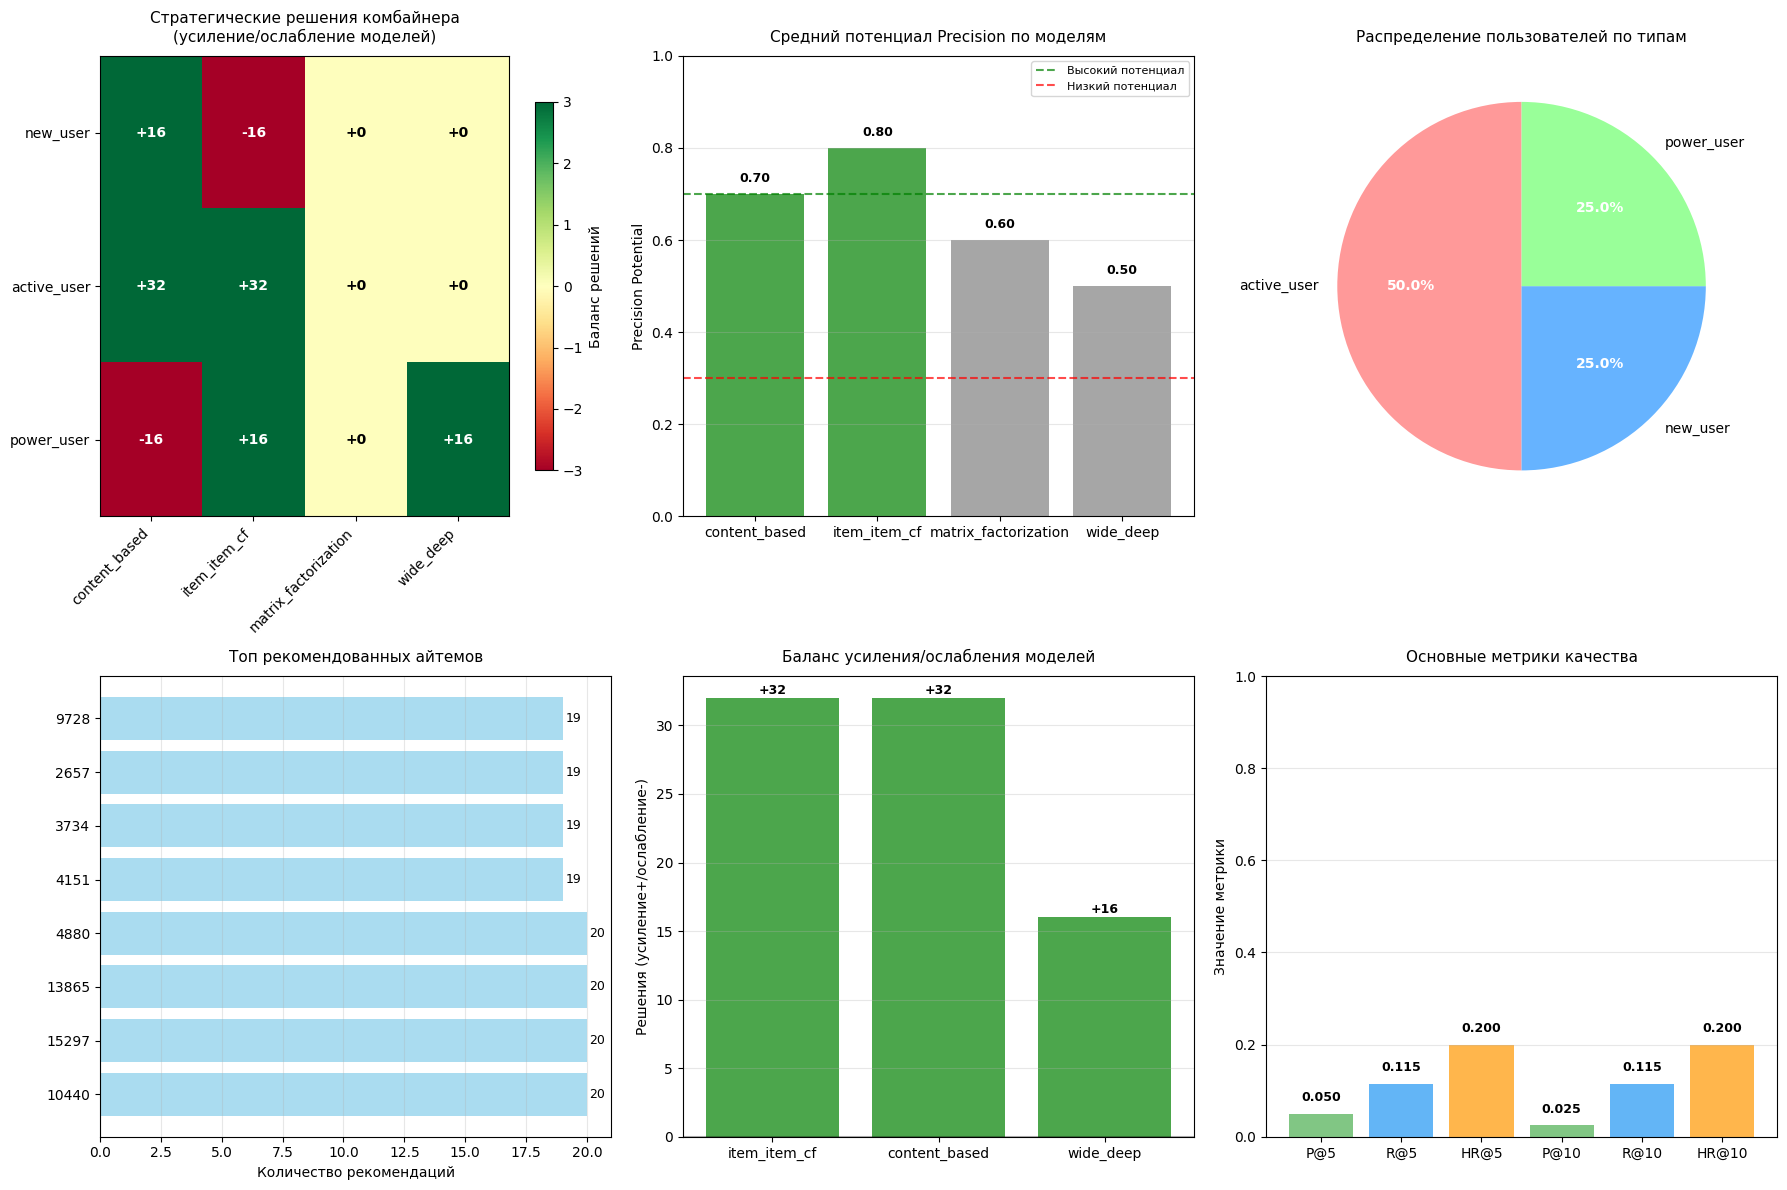

Аналитические выводы:
• Лучшая модель: item_item_cf (+32 решений)
• Проблемная модель: wide_deep (16 решений)
• Ошибок в работе моделей не обнаружено
• Низкое качество рекомендаций - требуется оптимизация

Обработано пользователей: 20


In [20]:
recommender = SparseDataRecommender()
try:
    recommendations, evaluation = recommender.run_pipeline(
        interactions_path='interactions_processed.csv',
        users_path='users_processed.csv',
        items_path='items_processed.csv'
    )

    print(f"\nОбработано пользователей: {len(recommendations)}")

except Exception as e:
    print(f"Ошибка: {e}")
    import traceback
    traceback.print_exc()